In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## FetchMaker

Congratulations! You’ve just started working at the hottest new tech startup, FetchMaker. FetchMaker’s mission is to match up prospective dog owners with their perfect pet. FetchMaker has been collecting data on their adoptable dogs, and it’s your job to analyze some of that data.

## Data to the Rescue
1. FetchMaker has provided us with data for a sample of dogs from their app, including the following attributes:

-    `weight`, an integer representing how heavy a dog is in pounds
-    `tail_length`, a float representing tail length in inches
-    `age`, in years
-    `color`, a String such as `"brown"` or `"grey"`
-    `is_rescue`, a boolean `0` or `1`

The data has been saved for you as a pandas DataFrame named dogs. Use the .head() method to inspect the first five rows of the dataset.


In [11]:
# Import data
dogs = pd.read_csv('dog_data.csv')

# Subset to just whippets, terriers, and pitbulls
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]

# Subset to just poodles and shihtzus
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]

In [4]:
dogs.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua


2. FetchMaker estimates (based on historical data for all dogs) that 8% of dogs in their system are rescues.

They would like to know if whippets are significantly more or less likely than other dogs to be a rescue.

Store the `is_rescue` values for `'whippet'`s in a variable called `whippet_rescue`.


In [6]:
whippet_rescue = dogs.is_rescue[dogs.breed == 'whippet']

3. How many whippets are rescues (remember that the value of is_rescue is 1 for rescues and 0 otherwise)? Save this number as num_whippet_rescues and print it out.

In [7]:
num_whippet_rescues = np.sum(whippet_rescue)
num_whippet_rescues

6

4. How many whippets are in this sample of data in total? Save this number as num_whippets and print it out.

In [8]:
num_whippets = len(whippet_rescue)
print(num_whippets)

100


5. Use a hypothesis test to test the following null and alternative hypotheses:

-    Null: 8% of whippets are rescues
-    Alternative: more or less than 8% of whippets are rescues

Save the p-value from this test as pval and print it out. Using a significance threshold of 0.05, Is the proportion of whippets who are rescues significantly different from 8%?


For this test, we are focused on a single binary categorical variable, which indicates whether or not each whippet is a rescue. We want to compare the number of rescues in our sample to a hypothetical population-level proportion of 0.08. Therefore, we should use a binomial test.

First, we need to import the `binom_test()` function:

`from scipy.stats import binom_test`

Then, we need to use the function to run our test (fill in the code below):

`pval = binom_test(x = ___, n = ___, p = ___)`

In general, `x` is the number of ‘successes’, `n` is the sample size, and `p` is the null probability of ‘success’.


In [10]:
from scipy.stats import binom_test
 
pval = binom_test(num_whippet_rescues, num_whippets, 0.8)
if pval < 0.05:
    print(str(pval) + ' indicates a significant difference.')
else:
    print(str(pval) + ' indicates no significant difference.')

6.2885044499588494e-58 indicates a significant difference.


## Mid-Sized Dog Weights
6. Three of FetchMaker’s most popular mid-sized dog breeds are 'whippet's, 'terrier's, and 'pitbull's. Is there a significant difference in the average weights of these three dog breeds?

To start answering this question, save the weights of each of these breeds in three separate series named wt_whippets, wt_terriers, and wt_pitbulls, respectively.


In [12]:
dogs_wtp.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
200,0,71,5.74,4,black,0,0,Charlot,pitbull
201,0,26,11.56,3,black,0,0,Jud,pitbull
202,0,56,10.76,4,black,0,0,Rosamund,pitbull
203,0,33,6.32,4,black,1,0,Ruthann,pitbull
204,0,54,17.18,4,black,1,1,Bryon,pitbull


In [13]:
wt_whippets = dogs_wtp.weight[dogs_wtp.breed == 'whippet']
wt_terriers = dogs_wtp.weight[dogs_wtp.breed == 'terrier']
wt_pitbulls = dogs_wtp.weight[dogs_wtp.breed == 'pitbull']

7. Run a single hypothesis test to address the following null and alternative hypotheses:

-    Null: whippets, terriers, and pitbulls all weigh the same amount on average
-    Alternative: whippets, terriers, and pitbulls do not all weigh the same amount on average (at least one pair of breeds has differing average weights)

Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of dog breeds that have significantly different average weights?

In [17]:
from scipy.stats import f_oneway

fstat, pval = f_oneway(wt_whippets, wt_terriers, wt_pitbulls)
if pval < 0.05:
    print(str(pval) + ' indicates at least on pair have a significant difference.')
else:
    print(str(pval) + ' indicates no significant difference between any pairs.')

3.276415588274815e-17 indicates at least on pair have a significant difference.


8. If you completed the previous step correctly, you should have concluded that at least one pair of dog breeds have significantly different average weights.

Run another hypothesis test to determine which of those breeds (whippets, terriers, and pitbulls) weigh different amounts on average. Use an overall type I error rate of 0.05 for all three comparisons. Note that we’ve already provided you with code in script.py to subset the data to just these breeds and have saved this subset as dogs_wtp using the following code:

`dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]`

This should make it easier for you to run the test you need!

Print out the results. Which pairs of dog breeds weigh different amounts?

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed, 0.05)
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
pitbull terrier   -13.24  0.001 -16.728 -9.752   True
pitbull whippet    -3.34 0.0639  -6.828  0.148  False
terrier whippet      9.9  0.001   6.412 13.388   True
-----------------------------------------------------


## Poodle and Shihtzu Colors
9. FetchMaker wants to know if `poodle`s and `shihtzu`s come in different colors. Note that we’ve already provided you with code in script.py to subset the data to just these breeds and have saved this subset as `dogs_ps` using the following code:

`dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]`

This should make it easier for you to investigate this question!

To start, use the subsetted data to create a contingency table of dog colors by breed (poodle vs. shihtzu). Save the table as Xtab and print it out.

In [19]:
dogs_ps.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
300,0,58,8.05,1,black,1,0,Moise,poodle
301,0,56,9.44,4,black,1,0,Boote,poodle
302,1,59,4.04,4,black,1,0,Beatrix,poodle
303,0,70,12.37,1,black,1,0,Rabbi,poodle
304,0,52,11.42,2,black,0,0,Tallou,poodle


In [20]:
Xtab = pd.crosstab(dogs_ps.breed, dogs_ps.color)
print(Xtab)

color    black  brown  gold  grey  white
breed                                   
poodle      17     13     8    52     10
shihtzu     10     36     6    41      7


10. Run a hypothesis test for the following null and alternative hypotheses:

-    Null: There is an association between breed (poodle vs. shihtzu) and color.
-    Alternative: There is not an association between breed (poodle vs. shihtzu) and color.

Save the p-value as pval and print it out. Do poodles and shihtzus come in significantly different color combinations? Use a significance threshold of 0.05.


In [23]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(Xtab)
if pval < 0.05:
    print(str(pval) + ' indicates there is an association.')
else:
    print(str(pval) + ' indicates there is no association.')

0.005302408293244597 indicates there is an association.


## Good learner! Have a treat!
11. Great job!

Feel free to play around with the FetchMaker data some more and run some hypothesis tests of your own.

The breeds you can explore are "poodle", "rottweiler", "whippet", "greyhound", "terrier", "chihuahua", "shihtzu", and "pitbull".

Extra challenge: Remind yourself of your data visualization skills and your ability to describe the central tendency of the data. For example, a boxplot visualization can add a lot to your understanding of an ANOVA result.


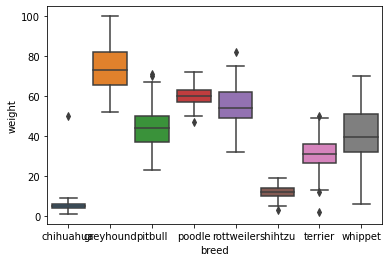

In [34]:
# create plot
sns.boxplot(data=dogs, x='breed', y='weight')
plt.show()

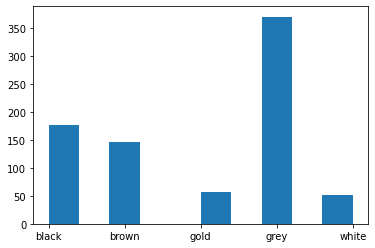

In [36]:
plt.hist(dogs.color)
plt.show()